MAJOR PROJECT2

In [ ]:
import pandas as pd
df = pd.read_csv('/content/House_Rent_Dataset.csv')
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [ ]:
df.info

<bound method DataFrame.info of        Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors

In [ ]:
df.size

56952

In [ ]:
df.shape

(4746, 12)

In [ ]:
#divide the data into input 
x = df.iloc[:,1:3].values
x

array([[    2, 10000],
       [    2, 20000],
       [    2, 17000],
       ...,
       [    3, 35000],
       [    3, 45000],
       [    2, 15000]])

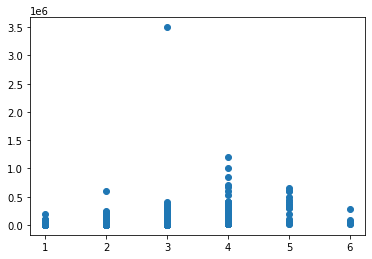

In [ ]:
#visualisation
import matplotlib.pyplot as plt
plt.scatter(df['BHK'],df['Rent'])



In [ ]:
#finde out the number of cluster(k)
import numpy as np
np.sqrt(4746) #4746 is the total no of rows

68.89121859859934

In [ ]:
#We need to find out the number of Cluster(k)
#1.ELBOW METHOD - Slightly confusing
#2.SILHOUETTE SCORE METHOD - Very Accurate

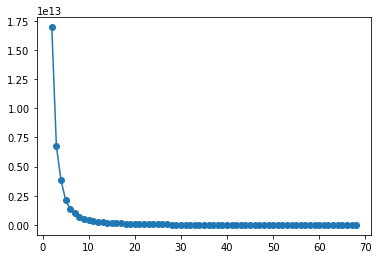

In [ ]:
#ELBOW METHOD:
from sklearn.cluster import KMeans
k = range(2,69)#2 is inclusive and 15 is exclusive

sse = [] #empty 
#for i in range(2,69):
for i in k:
  model_demo = KMeans(n_clusters = i,random_state = 0)
  model_demo.fit(x)
  sse.append(model_demo.inertia_)#.inertia - calculates the sum of squared error
plt.scatter(k,sse)
plt.plot(k,sse)

2 Clusters , Score = 0.9881737730325605
3 Clusters , Score = 0.8700423363691331
4 Clusters , Score = 0.8551851090158864
5 Clusters , Score = 0.7631415845468875
6 Clusters , Score = 0.7240316833259072
7 Clusters , Score = 0.7067541279926469
8 Clusters , Score = 0.6742677051105082
9 Clusters , Score = 0.6649153941849044
10 Clusters , Score = 0.6388752353262702
11 Clusters , Score = 0.5939154274470407
12 Clusters , Score = 0.5706681785593679
13 Clusters , Score = 0.5714093388172046
14 Clusters , Score = 0.5639671731816261
15 Clusters , Score = 0.5730611154078047
16 Clusters , Score = 0.570072830060405
17 Clusters , Score = 0.5602685159696144
18 Clusters , Score = 0.5701015581977666
19 Clusters , Score = 0.572481718985468
20 Clusters , Score = 0.5719270326172595
21 Clusters , Score = 0.5777356214822266
22 Clusters , Score = 0.5782701259899745
23 Clusters , Score = 0.5791833257659373
24 Clusters , Score = 0.5537456651364219
25 Clusters , Score = 0.5776082267499958
26 Clusters , Score = 0.55

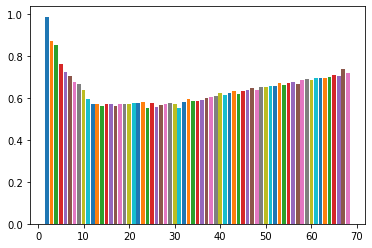

In [ ]:
# SILHOUETTE SCORE METHOD:
from sklearn.metrics import silhouette_score
k = range(2,69)
for i in k:
  model_demo = KMeans(n_clusters = i,random_state = 0)
  model_demo.fit(x)
  y_pred = model_demo.predict(x)
  print(f'{i} Clusters , Score = {silhouette_score(x,y_pred)}')
  plt.bar(i,silhouette_score(x,y_pred))

In [ ]:
#CONFIRMATION : The no of CLUSTERS to be CONSIDERED is 2

In [ ]:
#APPLY CLUSTERER
k = 2
from sklearn.cluster import KMeans
model = KMeans(n_clusters = k,random_state = 0)
model.fit(x)

KMeans(n_clusters=2, random_state=0)

In [ ]:
y = model.predict(x) #Predicted output values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
y.size

4746

In [ ]:
x[y == 1,1]
#the first '1' is the cluster no 1 and the second '1' is the column index 1
#the value of input , when cluster 1 is selected and column with index 1 is selected

array([3500000])

In [ ]:
np.unique(y,return_counts = True)

(array([0, 1], dtype=int32), array([4745,    1]))

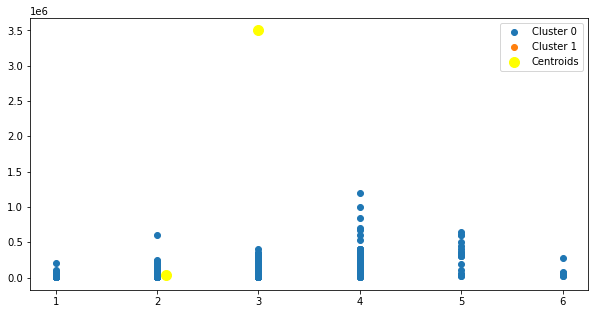

In [ ]:
#FINAL VISUALISATION
plt.figure(figsize = (10,5))
for i in range(k): # i iterates from 0 to 4
  plt.scatter(x[y == i,0],x[y == i,1],label = f'Cluster {i}')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 100,c = 'yellow',label = 'Centroids')
plt.legend()